In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.utils import load_json
import pandas as pd

# $D_{max}$ error cdfs

In [20]:
loaded_set = [load_json(f"../artifacts/embed_analysis/dmax_error_frac_swissprot_clean.json"),
              load_json(f"../artifacts/embed_analysis/dmax_error_frac_swissprot_esm.json")]

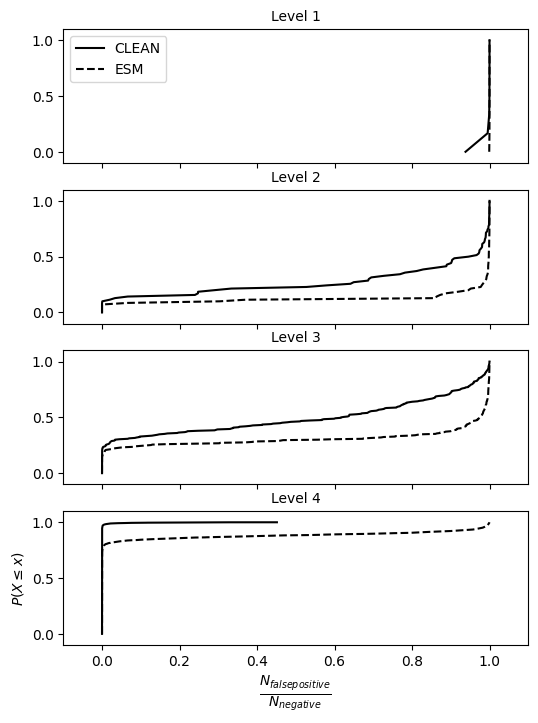

In [22]:
# Plot dmax error in cdfs
ep = 1e-1
n_levels = 4
fig, ax = plt.subplots(figsize=(6,8), nrows=n_levels, sharex=True, sharey=True)
colors = ['k', 'k', 'k', 'k']
linestyles = ['-', '--', '-', '--']
labels = ['CLEAN', 'ESM']
z = [128, 128, 1280, 1280] # n_dimensions

for j, elt in enumerate(loaded_set):
    for i,k in enumerate(elt.keys()):
        x = np.sort(elt[k])
        # x = np.sort(elt[k]) / z[j] # Normalize dmaxes by n_dimensions
        y = np.arange(len(x)) / (len(x) - 1)
        ax[i].plot(x, y, color=colors[j], label=labels[j], ls=linestyles[j])
        ax[i].set_title(f"Level {int(k)+1}", fontsize=10)

ax[-1].set_ylabel(r'$P(X \leq x)$')
# ax[-1].set_xlabel(r'$d_{max}$ / number of dimensions')
ax[-1].set_xlabel(r'$\frac{N_{false positive}}{N_{negative}}$', fontsize=14)
ax[0].set_ylim(-ep, 1 + ep)
ax[0].set_xlim(-ep, 1 + ep)
ax[0].legend()
plt.show()

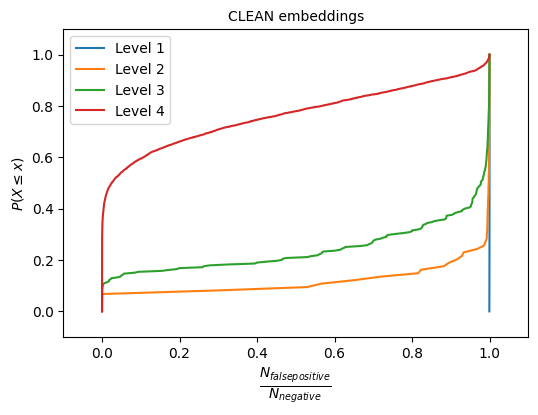

In [2]:
# Plot dmax error all curves 1 cdf with color labels
db = 'erxprot'
embed_type = 'clean'

for_plot = load_json(f"../artifacts/embed_analysis/dmax_error_frac_{db}_{embed_type}.json")
ep = 1e-1
n_levels = 4
fig, ax = plt.subplots(figsize=(6,4))

for i,k in enumerate(for_plot.keys()):
    x = np.sort(for_plot[k])
    y = np.arange(len(x)) / (len(x) - 1)
    ax.plot(x, y, label=f"Level {int(k)+1}", ls='-')
    ax.set_title(f"CLEAN embeddings", fontsize=10)

ax.set_ylabel(r'$P(X \leq x)$')
ax.set_xlabel(r'$\frac{N_{false positive}}{N_{negative}}$', fontsize=14)
ax.set_ylim(-ep, 1 + ep)
ax.set_xlim(-ep, 1 + ep)
ax.legend()
plt.show()

# $n^{th}$-level error

In [7]:
# Load data

db = 'erxprot'
train_db = 'swissprot'
embed_type = 'clean'

acc_path = f"../artifacts/embed_analysis/nth_level_accuracy_train_{train_db}_test_{db}_{embed_type}.json"
tot_path = f"../artifacts/embed_analysis/nth_level_totals_train_{train_db}_test_{db}_{embed_type}.json"
chance_path = f"../artifacts/embed_analysis/nth_level_chance_train_{train_db}_test_{db}_{embed_type}.json"

n_levels = 4

accuracy = load_json(acc_path)
total = load_json(tot_path)
chance = load_json(chance_path)

ecs_by_level = [[] for i in range(4)]
for k in accuracy.keys():
    ecs_by_level[len(k.split('.')) - 1].append(k)

In [8]:
# Arrange data for plot

# An array of data at each position of an n_levels
# length list
acc_arr = [[] for i in range(n_levels)] # Straight accuracy
rel_acc_arr = [[] for i in range(n_levels)] # Accuracy / chance accuracy
chance_arr = [[] for i in range(n_levels)] # Chance accuracy
err_by_chance_arr = [[] for i in range(n_levels)] # Chance error level
error_rate_arr = [[] for i in range(n_levels)] # Error rate
rel_err_arr = [[] for i in range(n_levels)] # Error rate / chance error
for l in range(n_levels):
    for elt in ecs_by_level[l]:
        if (elt in accuracy) & (elt in chance):
            acc_arr[l].append(accuracy[elt])
            rel_acc_arr[l].append((accuracy[elt] - chance[elt]) / chance[elt])
            chance_arr[l].append(chance[elt])
            err_by_chance_arr[l].append(1 - chance[elt])
            error_rate_arr[l].append(1 - accuracy[elt])
            rel_err_arr[l].append((1 - accuracy[elt]) / (1 - chance[elt]))

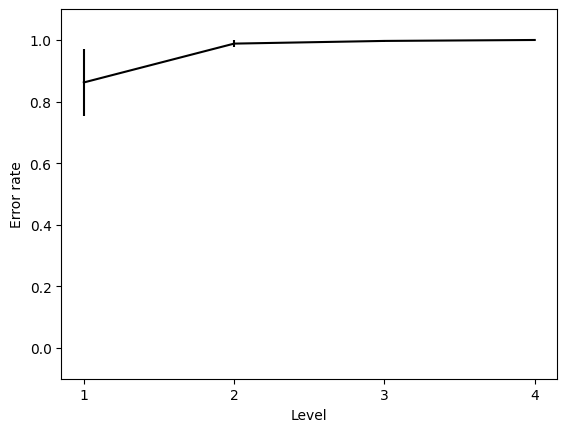

In [9]:
measure = error_rate_arr
ylabel = "Error rate"

level_arr = np.arange(1, n_levels+1)
ep = 1e-1
mean_measure = [np.array(elt).mean() for elt in measure]
sem_measure = [np.array(elt).std() / np.sqrt(len(elt)) for elt in measure]

fig, ax = plt.subplots()
ax.errorbar(level_arr, mean_measure, yerr=sem_measure, color='k')
ax.set_ylabel(ylabel)
ax.set_xlabel('Level')
ax.set_ylim(-ep, 1 + ep)
ax.set_xticks(level_arr)
plt.show()

In [39]:
# Overlap in enzymes

erx_csv = pd.read_csv('../data/erxprot/erxprot.csv', delimiter='\t')
erx_csv.set_index('Entry', inplace=True)

swissprot = pd.read_csv('../data/swissprot/swissprot.csv', delimiter='\t')
swissprot.set_index('Entry', inplace=True)

print(len(set(erx_csv.index) & set(swissprot.index)) / len(set(erx_csv.index) | set(swissprot.index)))
idx_intersect = list(set(erx_csv.index) & set(swissprot.index))

diff_seq = []
for elt in idx_intersect:
    if swissprot.loc[elt, 'Sequence'] != erx_csv.loc[elt, 'Sequence']:
        print(elt, 'seq')
        diff_seq.append(elt)
    if swissprot.loc[elt, 'EC number'].split(';')[0] != erx_csv.loc[elt, 'EC number'].split(';')[0]:
        print(elt, swissprot.loc[elt, 'EC number'], erx_csv.loc[elt, 'EC number'])

0.14423657628370382
D4N500 seq
P35630 seq
Q29513 seq
P9WQ38 seq
Q9BZG8 seq
P25154 seq
O06350 seq
Q9SQ70 seq
P66914 seq
P51607 seq
P9WFR9 seq
P00488 seq
Q5XG87 seq
Q2KIS1 seq
Q8BW41 seq
D4GYV5 seq
P31213 seq
O15770 seq
P49328 seq
P9WQ39 seq
O57426 seq
D4GZ88 seq
Q8NBQ5 seq
P12820 seq
Q6UWV6 seq
P55262 seq
Q8GBW6 seq
P51606 seq
Q5F783 seq
Q42963 seq
Q00532 seq
Q06509 seq
Q29555 seq
Q96H96 seq
P20231 seq
P29022 seq
Q5R7S7 seq
P37213 seq
P9WFX9 seq
Q9SEH4 seq
Q01433 seq
P9WKG7 seq
Q9DBT5 seq
O57425 seq
Q32P41 seq
P82343 seq
Q24803 seq
P56471 seq
P9WG77 seq
P08298 seq
P9WNW9 seq


In [40]:
len(diff_seq), len(idx_intersect)

(51, 41795)

In [41]:
from collections import Counter
idx = 'P35630'
s = swissprot.loc[idx, 'Sequence']
e = erx_csv.loc[idx, 'Sequence']
print(len(s), len(e))
for i, elt in enumerate(s):
    if elt != e[i]:
        print(i, elt, e[i])

# print(Counter(swissprot.loc['D4N500', 'Sequence']),  erx_csv.loc['D4N500', 'Sequence'])

360 366
1 K E
3 L K
4 A T
5 M T
6 L M
7 G K
8 I G
9 G L
10 R A
11 I M
12 G L
13 W G
15 E G
16 K R
17 K I
18 I G
19 P W
20 E I
21 C E
22 G K
23 P K
24 L I
25 D P
26 A E
27 L C
28 V G
29 R P
30 P L
31 L D
34 A V
35 P R
36 C P
37 T L
38 S A
39 D L
40 T A
41 H P
42 T C
43 V T
44 W S
45 A D
46 G T
47 A H
48 I T
49 G V
50 D W
51 R A
52 H G
53 D A
54 M I
55 I G
56 L D
57 G R
59 E D
60 A M
61 V I
62 G L
63 Q G
64 I H
65 V E
66 K A
69 S Q
70 L I
73 R V
74 L G
75 K S
76 V L
77 G V
78 D K
79 K R
80 V L
81 I K
83 P G
84 A D
85 I K
86 T V
87 P I
88 D V
89 W P
90 G A
91 E I
92 E T
93 E P
94 S D
95 Q W
96 R G
97 G E
98 Y E
99 P E
100 M S
101 H Q
102 S R
104 G Y
105 M P
106 L M
107 G H
108 G S
109 W G
110 K G
111 F M
112 S L
113 N G
114 F G
115 K W
116 D K
117 G F
118 V S
119 F N
120 S F
121 E K
122 V D
123 F G
124 H V
125 V F
126 N S
128 A V
129 D F
130 A H
131 N V
132 L N
133 A E
134 L A
135 L D
136 P A
137 R N
138 D L
139 I A
140 K L
141 P L
142 E P
143 D R
144 A D
145 V I
146 M K
147 L P
148 S E
1

In [12]:
# Overlap in EC numbers

first = 'swissprot'
second = 'erxprot'

first_df = pd.read_csv(f"../data/{first}/{first}.csv", delimiter='\t')
first_df.set_index('Entry', inplace=True)

second_df = pd.read_csv(f"../data/{second}/{second}.csv", delimiter='\t')
second_df.set_index('Entry', inplace=True)

first_ec = []
for elt in first_df.loc[:, 'EC number']:
    first_ec.append(elt.split(';')[0])

second_ec = []
for elt in second_df.loc[:, 'EC number']:
    second_ec.append(elt.split(';')[0])

print(len(set(first_ec) & set(second_ec)) / len(set(first_ec) | set(second_ec)))
print(len(set(first_ec) & set(second_ec)) / len(set(second_ec)))
ec_intersect = list(set(first_ec) & set(second_ec))

intersect_acc = []
intersect_tot = []
missing = []
for k in ec_intersect:
    if k in accuracy.keys():
        intersect_acc.append(accuracy[k])
        intersect_tot.append(total[k])
    else:
        missing.append(k)

for i, elt in enumerate(ec_intersect):
    print(elt, intersect_acc[i], intersect_tot[i])

0.8055647020085611
0.8140076526368325
7.1.2.1 0.0 25
5.5.1.29 0.0 2
5.3.1.30 0.0 25
5.3.1.15 0.0 22
4.2.2.22 0.0 25
1.14.14.43 0.0 1
3.1.1.1 0.0 30
4.2.1.161 0.0 14
5.3.2.6 0.0 25
2.4.1.161 0.0 25
4.2.3.33 0.0 1
4.2.99.23 0.0 1
2.8.1.6 0.0 20
3.5.2.6 0.0 18
2.7.7.8 0.0 25
2.3.1.110 0.0 15
3.4.24.72 0.0 5
1.1.1.31 0.0 25
6.1.1.22 0.0 25
2.7.7.39 0.0 24
4.1.99.11 0.0 25
5.4.99.2 0.0 25
3.1.1.64 0.0 16
2.7.7.99 0.0 25
6.1.1.27 0.0 25
3.1.1.81 0.0 12
2.5.1.49 0.0 20
2.1.1.150 0.0 17
1.8.7.1 0.0 25
4.1.1.31 0.0 25
1.17.4.4 0.0 25
5.3.1.25 0.0 24
2.1.1.112 0.0 25
2.7.1.172 0.0 23
4.2.1.12 0.0 24
6.6.1.2 0.0 24
2.1.1.9 0.0 14
3.4.17.1 0.0 25
4.2.3.2 0.0 25
5.4.99.42 0.0 2
3.1.4.3 0.0 21
2.3.2.26 0.0 26
3.7.1.2 0.0 25
2.7.7.77 0.0 25
1.13.11.72 0.0 6
6.2.1.57 0.0 3
3.5.4.46 0.0 2
2.8.1.1 0.0 25
1.1.1.299 0.0 6
3.4.21.93 0.0 25
7.5.2.3 0.0 23
1.1.99.29 0.0 25
1.1.99.31 0.0 25
3.5.4.23 0.0 25
2.3.1.288 0.0 5
1.5.1.20 0.0 48
3.4.19.12 0.0 25
4.2.1.134 0.0 25
1.2.1.59 0.0 25
3.5.1.32 0.0 25
3.4.21

In [11]:
missing

[]

In [82]:
this_ec = '4.2.1.17'
np.array(this_ec.split('.')).astype(str)

array(['4', '2', '1', '17'], dtype='<U2')

# Masked label prediction accuracy

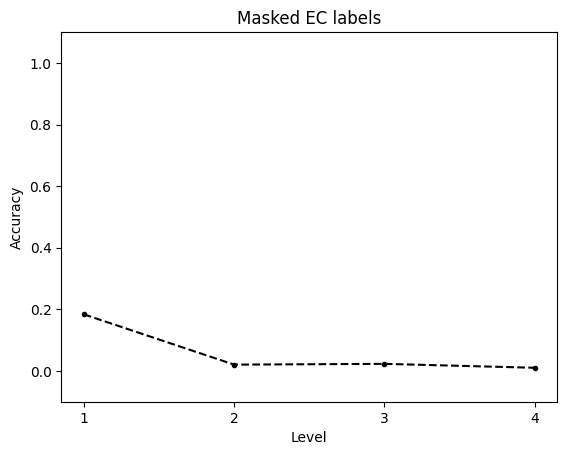

In [40]:
db = 'new'
train_db = 'erxprot'
embed_type = 'clean'

# Load data
mask_accuracy = []
with open(f"../artifacts/embed_analysis/masked_label_prediction_acc_train_{train_db}_test_{db}_{embed_type}.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        mask_accuracy.append(float(line.strip()))

x = np.arange(1, n_levels + 1)
ep = 1e-1
fig, ax = plt.subplots()
ax.set_title("Masked EC labels")
ax.plot(x, mask_accuracy, 'k.--')
ax.set_ylim(-ep, 1 + ep)
ax.set_xticks(x)
ax.set_ylim(-ep, 1 + ep)
ax.set_xticks(x)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Level')
plt.show()